In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import requests
import warnings
import re
from glob import glob

In [3]:
%matplotlib inline
pd.set_option("display.max_columns", None)
warnings.filterwarnings(action='once')

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='style-table.css' mode='r' encoding='cp1252'>
  
C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='style-notebook.css' mode='r' encoding='cp1252'>
  


The data being being explored comes from 101480 5v5 ranked games in the 2018 season.  Match data was gathered from players that ranked Diamond or above.

In [5]:
#ignore ecoding errors because some player names have different encoding
#due to multiple encoding and ignoring errors, we end up losing data wit other issues
'''
with open('PlayerMatches\\masterdata.csv', 'a', errors='ignore') as master:
    #write first dataset with header
    with open('PlayerMatches\\match_data_1.csv', errors='ignore') as first_file:
        for line in first_file:
            master.write(line)
    #write second to 6th file without headers        
    for num in range(2,7):
        with open('PlayerMatches\\match_data_'+ str(num) + '.csv', errors='ignore') as next_files:
            next_files.__next__()
            for line in next_files:
                master.write(line)
'''

"\nwith open('PlayerMatches\\masterdata.csv', 'a', errors='ignore') as master:\n    #write first dataset with header\n    with open('PlayerMatches\\match_data_1.csv', errors='ignore') as first_file:\n        for line in first_file:\n            master.write(line)\n    #write second to 6th file without headers        \n    for num in range(2,7):\n        with open('PlayerMatches\\match_data_'+ str(num) + '.csv', errors='ignore') as next_files:\n            next_files.__next__()\n            for line in next_files:\n                master.write(line)\n"

Load in all Data as one Pandas Dataframe

In [6]:
files = glob('PlayerMatches\\match_data_*.csv')

In [7]:
dataframes = [pd.read_csv(f) for f in files]

C:\Users\jltsa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (30,31,139,140,248,249,357,358,466,467,575,576,684,685,793,794,902,903,1011,1012) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\jltsa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (30,31,34,35,139,140,143,144,248,249,252,253,357,358,361,362,466,467,470,471,575,576,579,580,684,685,688,689,793,794,797,798,902,903,906,907,1011,1012,1015,1016) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [8]:
concat = pd.concat(dataframes, ignore_index=True)

Further cleaning of the data as we do exploratory data analysis.

I found out there are columns that existed to hold data from older game modes that are no longer in the game, but the columns still exist with 0 values.

TO DO:
Edit Data wrangling paper and with removal of these columns as well as explaining why I kept null values in some columns (Ex, item slots of id num 0 means no item was bought)

In [9]:
#Removing columns that have all 0 values 'p#playerScore#'
def remove_cols():
    l = []
    for num in range(10):
        for num2 in range(10):
            col = f'p{num+1}playerScore{num2}'
            l.append(col)
    
    return l
    

In [10]:
r = remove_cols()
2 #other columns with no data
col = ['blue_team_dominionVictoryScore', 'red_team_dominionVictoryScore',
        'Unnamed: 0', 'blue_team_vilemawKills', 'red_team_vilemawKills']
r += col

In [11]:
#remove columns not needed
concat.drop(axis=1, labels=r, inplace=True)

In [12]:
concat.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113447 entries, 0 to 113446
Data columns (total 1016 columns):
blue_team_baronKills                  113447 non-null int64
blue_team_dragonKills                 113447 non-null int64
blue_team_firstBaron                  113447 non-null bool
blue_team_firstBlood                  113447 non-null bool
blue_team_firstDragon                 113447 non-null bool
blue_team_firstInhibitor              113447 non-null bool
blue_team_firstRiftHerald             113447 non-null bool
blue_team_firstTower                  113447 non-null bool
blue_team_inhibitorKills              113447 non-null int64
blue_team_riftHeraldKills             113447 non-null int64
blue_team_towerKills                  113447 non-null int64
blue_team_win                         113447 non-null object
game_id                               113447 non-null int64
game_length_mins                      113447 non-null int64
p10_champ                             113447 non-nul

In [13]:
concat.head()

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstBlood,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills,blue_team_win,game_id,game_length_mins,p10_champ,p10_name,p10_spell1,p10_spell2,p10_team,p10assists,p10champLevel,p10combatPlayerScore,p10damageDealtToObjectives,p10damageDealtToTurrets,p10damageSelfMitigated,p10deaths,p10doubleKills,p10firstBloodAssist,p10firstBloodKill,p10firstInhibitorAssist,p10firstInhibitorKill,p10firstTowerAssist,p10firstTowerKill,p10goldEarned,p10goldSpent,p10inhibitorKills,p10item0,p10item1,p10item2,p10item3,p10item4,p10item5,p10item6,p10killingSprees,p10kills,p10largestCriticalStrike,p10largestKillingSpree,p10largestMultiKill,p10longestTimeSpentLiving,p10magicDamageDealt,p10magicDamageDealtToChampions,p10magicalDamageTaken,p10neutralMinionsKilled,p10neutralMinionsKilledEnemyJungle,p10neutralMinionsKilledTeamJungle,p10objectivePlayerScore,p10participantId,p10pentaKills,p10perk0,p10perk0Var1,p10perk0Var2,p10perk0Var3,p10perk1,p10perk1Var1,p10perk1Var2,p10perk1Var3,p10perk2,p10perk2Var1,p10perk2Var2,p10perk2Var3,p10perk3,p10perk3Var1,p10perk3Var2,p10perk3Var3,p10perk4,p10perk4Var1,p10perk4Var2,p10perk4Var3,p10perk5,p10perk5Var1,p10perk5Var2,p10perk5Var3,p10perkPrimaryStyle,p10perkSubStyle,p10physicalDamageDealt,p10physicalDamageDealtToChampions,p10physicalDamageTaken,p10quadraKills,p10sightWardsBoughtInGame,p10statPerk0,p10statPerk1,p10statPerk2,p10timeCCingOthers,p10totalDamageDealt,p10totalDamageDealtToChampions,p10totalDamageTaken,p10totalHeal,p10totalMinionsKilled,p10totalPlayerScore,p10totalScoreRank,p10totalTimeCrowdControlDealt,p10totalUnitsHealed,p10tripleKills,p10trueDamageDealt,p10trueDamageDealtToChampions,p10trueDamageTaken,p10turretKills,p10unrealKills,p10visionScore,p10visionWardsBoughtInGame,p10wardsKilled,p10wardsPlaced,p10win,p1_champ,p1_name,p1_spell1,p1_spell2,p1_team,p1assists,p1champLevel,p1combatPlayerScore,p1damageDealtToObjectives,p1damageDealtToTurrets,p1damageSelfMitigated,p1deaths,p1doubleKills,p1firstBloodAssist,p1firstBloodKill,p1firstInhibitorAssist,p1firstInhibitorKill,p1firstTowerAssist,p1firstTowerKill,p1goldEarned,p1goldSpent,p1inhibitorKills,p1item0,p1item1,p1item2,p1item3,p1item4,p1item5,p1item6,p1killingSprees,p1kills,p1largestCriticalStrike,p1largestKillingSpree,p1largestMultiKill,p1longestTimeSpentLiving,p1magicDamageDealt,p1magicDamageDealtToChampions,p1magicalDamageTaken,p1neutralMinionsKilled,p1neutralMinionsKilledEnemyJungle,p1neutralMinionsKilledTeamJungle,p1objectivePlayerScore,p1participantId,p1pentaKills,p1perk0,p1perk0Var1,p1perk0Var2,p1perk0Var3,p1perk1,p1perk1Var1,p1perk1Var2,p1perk1Var3,p1perk2,p1perk2Var1,p1perk2Var2,p1perk2Var3,p1perk3,p1perk3Var1,p1perk3Var2,p1perk3Var3,p1perk4,p1perk4Var1,p1perk4Var2,p1perk4Var3,p1perk5,p1perk5Var1,p1perk5Var2,p1perk5Var3,p1perkPrimaryStyle,p1perkSubStyle,p1physicalDamageDealt,p1physicalDamageDealtToChampions,p1physicalDamageTaken,p1quadraKills,p1sightWardsBoughtInGame,p1statPerk0,p1statPerk1,p1statPerk2,p1timeCCingOthers,p1totalDamageDealt,p1totalDamageDealtToChampions,p1totalDamageTaken,p1totalHeal,p1totalMinionsKilled,p1totalPlayerScore,p1totalScoreRank,p1totalTimeCrowdControlDealt,p1totalUnitsHealed,p1tripleKills,p1trueDamageDealt,p1trueDamageDealtToChampions,p1trueDamageTaken,p1turretKills,p1unrealKills,p1visionScore,p1visionWardsBoughtInGame,p1wardsKilled,p1wardsPlaced,p1win,p2_champ,p2_name,p2_spell1,p2_spell2,p2_team,p2assists,p2champLevel,p2combatPlayerScore,p2damageDealtToObjectives,p2damageDealtToTurrets,p2damageSelfMitigated,p2deaths,p2doubleKills,p2firstBloodAssist,p2firstBloodKill,p2firstInhibitorAssist,p2firstInhibitorKill,p2firstTowerAssist,p2firstTowerKill,p2goldEarned,p2goldSpent,p2inhibitorKills,p2item0,p2item1,p2item2,p2item3,p2item4,p2item5,p2item6,p2killingSprees,p2kills,p2largestCriticalStrike,p2largestKillingSpree,p2largestMultiKill,p2longestTime

Questions:
What factors have an effect on game times?
Did 2018 World championship have any affect on the game?


Creating a function that will return all games wit a specific champion played.  Plans to use this later in exploring data.

In [14]:
def champ_frame(data_frame, champ_name):
    '''
    return a data frame of matches where a specific champion is played
    '''
    c1 = data_frame[data_frame.p1_champ == champ_name]
    c2 = data_frame[data_frame.p2_champ == champ_name]
    c3 = data_frame[data_frame.p3_champ == champ_name]
    c4 = data_frame[data_frame.p4_champ == champ_name]
    c5 = data_frame[data_frame.p5_champ == champ_name]
    c6 = data_frame[data_frame.p6_champ == champ_name]
    c7 = data_frame[data_frame.p7_champ == champ_name]
    c8 = data_frame[data_frame.p8_champ == champ_name]
    c9 = data_frame[data_frame.p9_champ == champ_name]
    c10 = data_frame[data_frame.p10_champ == champ_name]
    
    return pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
    

In [15]:
vaynes = champ_frame(concat, 'Vayne')

In [16]:
vaynes.head()

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstBlood,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills,blue_team_win,game_id,game_length_mins,p10_champ,p10_name,p10_spell1,p10_spell2,p10_team,p10assists,p10champLevel,p10combatPlayerScore,p10damageDealtToObjectives,p10damageDealtToTurrets,p10damageSelfMitigated,p10deaths,p10doubleKills,p10firstBloodAssist,p10firstBloodKill,p10firstInhibitorAssist,p10firstInhibitorKill,p10firstTowerAssist,p10firstTowerKill,p10goldEarned,p10goldSpent,p10inhibitorKills,p10item0,p10item1,p10item2,p10item3,p10item4,p10item5,p10item6,p10killingSprees,p10kills,p10largestCriticalStrike,p10largestKillingSpree,p10largestMultiKill,p10longestTimeSpentLiving,p10magicDamageDealt,p10magicDamageDealtToChampions,p10magicalDamageTaken,p10neutralMinionsKilled,p10neutralMinionsKilledEnemyJungle,p10neutralMinionsKilledTeamJungle,p10objectivePlayerScore,p10participantId,p10pentaKills,p10perk0,p10perk0Var1,p10perk0Var2,p10perk0Var3,p10perk1,p10perk1Var1,p10perk1Var2,p10perk1Var3,p10perk2,p10perk2Var1,p10perk2Var2,p10perk2Var3,p10perk3,p10perk3Var1,p10perk3Var2,p10perk3Var3,p10perk4,p10perk4Var1,p10perk4Var2,p10perk4Var3,p10perk5,p10perk5Var1,p10perk5Var2,p10perk5Var3,p10perkPrimaryStyle,p10perkSubStyle,p10physicalDamageDealt,p10physicalDamageDealtToChampions,p10physicalDamageTaken,p10quadraKills,p10sightWardsBoughtInGame,p10statPerk0,p10statPerk1,p10statPerk2,p10timeCCingOthers,p10totalDamageDealt,p10totalDamageDealtToChampions,p10totalDamageTaken,p10totalHeal,p10totalMinionsKilled,p10totalPlayerScore,p10totalScoreRank,p10totalTimeCrowdControlDealt,p10totalUnitsHealed,p10tripleKills,p10trueDamageDealt,p10trueDamageDealtToChampions,p10trueDamageTaken,p10turretKills,p10unrealKills,p10visionScore,p10visionWardsBoughtInGame,p10wardsKilled,p10wardsPlaced,p10win,p1_champ,p1_name,p1_spell1,p1_spell2,p1_team,p1assists,p1champLevel,p1combatPlayerScore,p1damageDealtToObjectives,p1damageDealtToTurrets,p1damageSelfMitigated,p1deaths,p1doubleKills,p1firstBloodAssist,p1firstBloodKill,p1firstInhibitorAssist,p1firstInhibitorKill,p1firstTowerAssist,p1firstTowerKill,p1goldEarned,p1goldSpent,p1inhibitorKills,p1item0,p1item1,p1item2,p1item3,p1item4,p1item5,p1item6,p1killingSprees,p1kills,p1largestCriticalStrike,p1largestKillingSpree,p1largestMultiKill,p1longestTimeSpentLiving,p1magicDamageDealt,p1magicDamageDealtToChampions,p1magicalDamageTaken,p1neutralMinionsKilled,p1neutralMinionsKilledEnemyJungle,p1neutralMinionsKilledTeamJungle,p1objectivePlayerScore,p1participantId,p1pentaKills,p1perk0,p1perk0Var1,p1perk0Var2,p1perk0Var3,p1perk1,p1perk1Var1,p1perk1Var2,p1perk1Var3,p1perk2,p1perk2Var1,p1perk2Var2,p1perk2Var3,p1perk3,p1perk3Var1,p1perk3Var2,p1perk3Var3,p1perk4,p1perk4Var1,p1perk4Var2,p1perk4Var3,p1perk5,p1perk5Var1,p1perk5Var2,p1perk5Var3,p1perkPrimaryStyle,p1perkSubStyle,p1physicalDamageDealt,p1physicalDamageDealtToChampions,p1physicalDamageTaken,p1quadraKills,p1sightWardsBoughtInGame,p1statPerk0,p1statPerk1,p1statPerk2,p1timeCCingOthers,p1totalDamageDealt,p1totalDamageDealtToChampions,p1totalDamageTaken,p1totalHeal,p1totalMinionsKilled,p1totalPlayerScore,p1totalScoreRank,p1totalTimeCrowdControlDealt,p1totalUnitsHealed,p1tripleKills,p1trueDamageDealt,p1trueDamageDealtToChampions,p1trueDamageTaken,p1turretKills,p1unrealKills,p1visionScore,p1visionWardsBoughtInGame,p1wardsKilled,p1wardsPlaced,p1win,p2_champ,p2_name,p2_spell1,p2_spell2,p2_team,p2assists,p2champLevel,p2combatPlayerScore,p2damageDealtToObjectives,p2damageDealtToTurrets,p2damageSelfMitigated,p2deaths,p2doubleKills,p2firstBloodAssist,p2firstBloodKill,p2firstInhibitorAssist,p2firstInhibitorKill,p2firstTowerAssist,p2firstTowerKill,p2goldEarned,p2goldSpent,p2inhibitorKills,p2item0,p2item1,p2item2,p2item3,p2item4,p2item5,p2item6,p2killingSprees,p2kills,p2largestCriticalStrike,p2largestKillingSpree,p2largestMultiKill,p2longestTime

Exploring factors that affect matchtimes

Champ types?  Does having a certain type of champ in a game affect game time?

In [17]:
#Champion Information
champion_data_url = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion.json'
champ_response = requests.get(champion_data_url)
champ_json = champ_response.json()
#champ_json

In [18]:
#Champ list
champ_list = []
for champ in champ_json['data']:
    champ_list.append(champ)
#champ_list

In [19]:
#Champ type
champ_type = {}

for champ in champ_list:
    champ_type[champ] = champ_json['data'][champ]['tags']

#champ_type

In [20]:
prim_roles = {}
for champ in champ_type:
    prim_roles[champ] = champ_type[champ][0]

In [21]:
sec_roles = {}
for champ in champ_type:
    if len(champ_type[champ]) != 2:
        sec_roles[champ] = "None"
    else:
        sec_roles[champ] = champ_type[champ][1]

In [22]:
#create dataframe of champs
champ_roles_df = concat[['p1_champ', 'p2_champ', 'p3_champ', 'p4_champ', 'p5_champ',
                        'p6_champ', 'p7_champ', 'p8_champ', 'p9_champ', 'p10_champ',
                        'game_length_mins', 'game_id']]


In [23]:
#create dataframe of champ types/roles
#map champion roles
champ_roles_df['p1_champ_prim_role'] = champ_roles_df['p1_champ'].map(prim_roles)
champ_roles_df['p2_champ_prim_role'] = champ_roles_df['p2_champ'].map(prim_roles)
champ_roles_df['p3_champ_prim_role'] = champ_roles_df['p3_champ'].map(prim_roles)
champ_roles_df['p4_champ_prim_role'] = champ_roles_df['p4_champ'].map(prim_roles)
champ_roles_df['p5_champ_prim_role'] = champ_roles_df['p5_champ'].map(prim_roles)
champ_roles_df['p6_champ_prim_role'] = champ_roles_df['p6_champ'].map(prim_roles)
champ_roles_df['p7_champ_prim_role'] = champ_roles_df['p7_champ'].map(prim_roles)
champ_roles_df['p8_champ_prim_role'] = champ_roles_df['p8_champ'].map(prim_roles)
champ_roles_df['p9_champ_prim_role'] = champ_roles_df['p9_champ'].map(prim_roles)
champ_roles_df['p10_champ_prim_role'] = champ_roles_df['p10_champ'].map(prim_roles)
champ_roles_df['p1_champ_sec_role'] = champ_roles_df['p1_champ'].map(sec_roles)
champ_roles_df['p2_champ_sec_role'] = champ_roles_df['p2_champ'].map(sec_roles)
champ_roles_df['p3_champ_sec_role'] = champ_roles_df['p3_champ'].map(sec_roles)
champ_roles_df['p4_champ_sec_role'] = champ_roles_df['p4_champ'].map(sec_roles)
champ_roles_df['p5_champ_sec_role'] = champ_roles_df['p5_champ'].map(sec_roles)
champ_roles_df['p6_champ_sec_role'] = champ_roles_df['p6_champ'].map(sec_roles)
champ_roles_df['p7_champ_sec_role'] = champ_roles_df['p7_champ'].map(sec_roles)
champ_roles_df['p8_champ_sec_role'] = champ_roles_df['p8_champ'].map(sec_roles)
champ_roles_df['p9_champ_sec_role'] = champ_roles_df['p9_champ'].map(sec_roles)
champ_roles_df['p10_champ_sec_role'] = champ_roles_df['p10_champ'].map(sec_roles)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#convert seconds to minutes
champ_roles_df.game_length_mins = champ_roles_df.game_length_mins / 60

C:\Users\jltsa\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
#create columns with counts of each role
role1 = ["Tank"]
role2 = ["Mage"]
role3 = ["Marksman"]
role4 = ["Support"]
role5 = ["Fighter"]
role6 = ["Assassin"]
champ_roles_df['tank_count'] = champ_roles_df.isin(role1).sum(1)
champ_roles_df['mage_count'] = champ_roles_df.isin(role2).sum(1)
champ_roles_df['marksman_count'] = champ_roles_df.isin(role3).sum(1)
champ_roles_df['support_count'] = champ_roles_df.isin(role4).sum(1)
champ_roles_df['fighter_count'] = champ_roles_df.isin(role5).sum(1)
champ_roles_df['assassin_count'] = champ_roles_df.isin(role6).sum(1)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


First, let's look at match times with in the minute

In [26]:
role_counts = champ_roles_df[['game_length_mins', 'tank_count', 'fighter_count',
                              'assassin_count', 'support_count', 'marksman_count',
                             'mage_count']]
#Do not count games with remakes < 3 mins
#greater than 15 min b/c 15 mins is the earliest to surrender
rc = role_counts
rc = rc[(rc.game_length_mins > 15)]
#want to group games by whole minutes
rc['game_length_mins'] = rc.game_length_mins // 1
game_length = rc[['game_length_mins']]

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
rc.head()

,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
0,38.0,2,3,2,3,3,5
1,23.0,1,3,5,2,4,3
2,31.0,1,4,3,3,2,5
3,35.0,2,6,1,1,4,2
4,23.0,0,2,4,2,5,5


In [28]:
#Number of matches falling within certain minutes
rg = rc.groupby('game_length_mins').size()
rg

game_length_mins
15.0    3495
16.0    1867
17.0    1278
18.0    1964
19.0    2510
20.0    5047
21.0    4910
22.0    5656
23.0    6845
24.0    7063
25.0    7464
26.0    7367
27.0    6718
28.0    6632
29.0    6109
30.0    5738
31.0    5066
32.0    4423
33.0    3789
34.0    3225
35.0    2562
36.0    2168
37.0    1894
38.0    1555
39.0    1084
40.0     974
41.0     757
42.0     549
43.0     404
44.0     300
45.0     238
46.0     194
47.0     161
48.0      92
49.0      76
50.0      60
51.0      53
52.0      17
53.0      32
54.0      14
55.0      18
56.0       3
57.0      16
58.0       4
59.0      12
60.0       4
61.0       2
62.0       1
67.0       5
72.0       1
dtype: int64

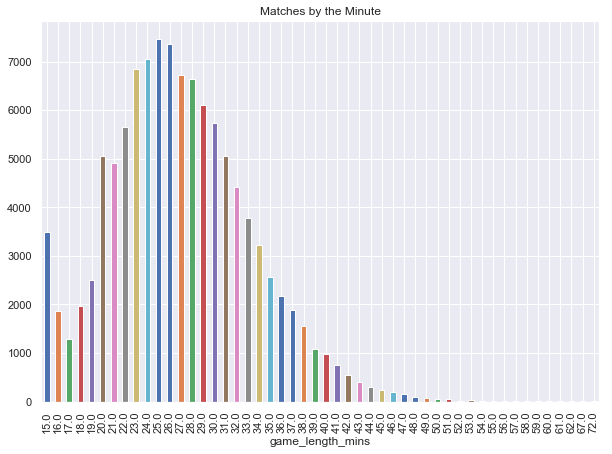

In [29]:
rg.plot(kind='bar', figsize=(10,7), title ='Matches by the Minute')

Its worth noting that games ending before 20 minutes were early surrenders or in some cases games were closed out very fast. Its hard

In [30]:
rc.game_length_mins.describe()

count    110416.000000
mean         27.000598
std           6.369664
min          15.000000
25%          23.000000
50%          26.000000
75%          31.000000
max          72.000000
Name: game_length_mins, dtype: float64

The average game time is around 27 minutes.

Taking a look at the champion picks overall

In [31]:
rc.head()

,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
0,38.0,2,3,2,3,3,5
1,23.0,1,3,5,2,4,3
2,31.0,1,4,3,3,2,5
3,35.0,2,6,1,1,4,2
4,23.0,0,2,4,2,5,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002151F2AACC0>,
      dtype=object)

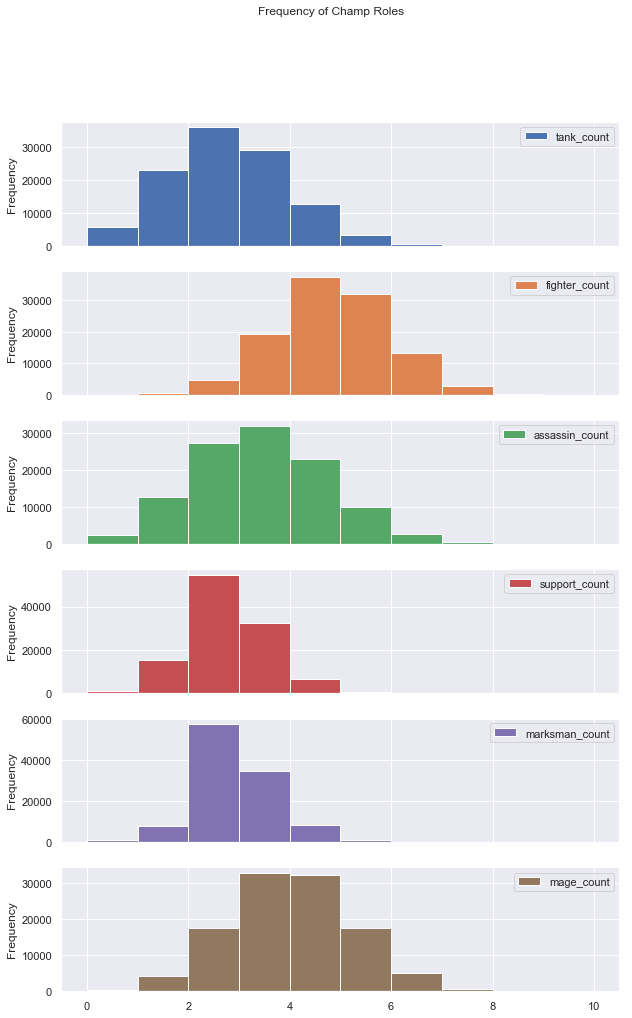

In [32]:
rc.set_index('game_length_mins').plot(kind='hist', subplots=True, figsize=(10, 16), title='Frequency of Champ Roles')

In [33]:
r1 = rc.support_count.sum()
r2 = rc.marksman_count.sum()
r3 = rc.mage_count.sum()
r4 = rc.tank_count.sum()
r5 = rc.assassin_count.sum()
r6 = rc.fighter_count.sum()
tot = r1+r2+r3+r4+r5+r6

In [34]:
print(f'supports: {r1}, {(r1/tot) * 100}%')
print(f'marksmen: {r2}, {(r2/tot) * 100}%')
print(f'mage: {r3}, {(r3/tot) * 100}%')
print(f'tank: {r4}, {(r4/tot) * 100}%')
print(f'assassin: {r5}, {(r5/tot) * 100}%')
print(f'fighter: {r6}, {(r6/tot) * 100}%')

supports: 251167, 12.797601153565916%
marksmen: 265041, 13.504516944273186%
mage: 389551, 19.84861994996459%
tank: 252543, 12.867711873474608%
assassin: 324556, 16.53695843799838%
fighter: 479752, 24.444591640723324%


You can see that the picks of marksman and support almost mirror each other, which makes sense considering that it is meta to always have a support and marksman paired together in a lane in every game.

Looking at how number of tanks affect game times

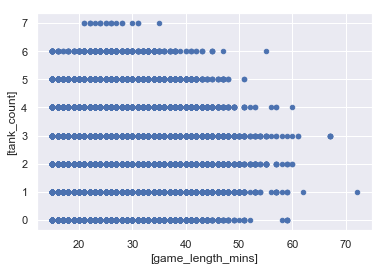

In [35]:
rc.plot(x=['game_length_mins'], y=['tank_count'], kind='scatter')

In [36]:
tank1 = rc[rc.tank_count == 1]
tank2 = rc[rc.tank_count == 2]
tank3 = rc[rc.tank_count == 3]
tank4 = rc[rc.tank_count == 4]
tank5 = rc[rc.tank_count == 5]
tank6 = rc[rc.tank_count == 6]
tank7 = rc[rc.tank_count == 7]

In [37]:
tank1.game_length_mins.describe()

count    23022.000000
mean        27.111589
std          6.495819
min         15.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

In [38]:
tank2.game_length_mins.describe()

count    35977.000000
mean        26.930233
std          6.375867
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         60.000000
Name: game_length_mins, dtype: float64

In [39]:
tank3.game_length_mins.describe()

count    28974.000000
mean        26.992027
std          6.315646
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         67.000000
Name: game_length_mins, dtype: float64

In [40]:
tank4.game_length_mins.describe()

count    12773.000000
mean        26.886010
std          6.200772
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         60.000000
Name: game_length_mins, dtype: float64

In [41]:
tank5.game_length_mins.describe()

count    3328.000000
mean       27.090445
std         6.260783
min        15.000000
25%        23.000000
50%        26.000000
75%        31.000000
max        51.000000
Name: game_length_mins, dtype: float64

In [42]:
tank6.game_length_mins.describe()

count    461.000000
mean      27.193059
std        6.483393
min       15.000000
25%       23.000000
50%       26.000000
75%       32.000000
max       55.000000
Name: game_length_mins, dtype: float64

In [43]:
tank7.game_length_mins.describe()

count    21.000000
mean     25.761905
std       3.713553
min      21.000000
25%      23.000000
50%      25.000000
75%      28.000000
max      35.000000
Name: game_length_mins, dtype: float64

I first thought that having more tanks in the game would draw out game time.  But more tanks in a game seems to have little affect on the average game time.

Games with assassins should have higher kill counts and higher chance of a champion snowballing

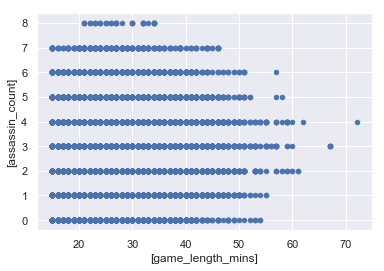

In [44]:
rc.plot(x=['game_length_mins'], y=['assassin_count'], kind='scatter')

In [45]:
a1 = rc[rc.assassin_count == 1]
a2 = rc[rc.assassin_count == 2]
a3 = rc[rc.assassin_count == 3]
a4 = rc[rc.assassin_count == 4]
a5 = rc[rc.assassin_count == 5]
a6 = rc[rc.assassin_count == 6]
a7 = rc[rc.assassin_count == 7]
a8 = rc[rc.assassin_count == 8]

In [46]:
a1.game_length_mins.describe()

count    12713.000000
mean        27.025171
std          6.397765
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         55.000000
Name: game_length_mins, dtype: float64

In [47]:
a2.game_length_mins.describe()

count    27162.000000
mean        27.031883
std          6.358972
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         61.000000
Name: game_length_mins, dtype: float64

In [48]:
a3.game_length_mins.describe()

count    31951.000000
mean        27.012832
std          6.350396
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         67.000000
Name: game_length_mins, dtype: float64

In [49]:
a4.game_length_mins.describe()

count    22984.000000
mean        26.917377
std          6.389394
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

In [50]:
a5.game_length_mins.describe()

count    9921.000000
mean       27.010987
std         6.295990
min        15.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        58.000000
Name: game_length_mins, dtype: float64

In [51]:
a6.game_length_mins.describe()

count    2805.000000
mean       26.821747
std         6.322550
min        15.000000
25%        22.000000
50%        26.000000
75%        30.000000
max        57.000000
Name: game_length_mins, dtype: float64

In [52]:
a7.game_length_mins.describe()

count    425.000000
mean      27.376471
std        7.208774
min       15.000000
25%       22.000000
50%       27.000000
75%       32.000000
max       46.000000
Name: game_length_mins, dtype: float64

In [53]:
a8.game_length_mins.describe()

count    40.000000
mean     27.475000
std       4.449071
min      21.000000
25%      23.750000
50%      27.000000
75%      32.000000
max      34.000000
Name: game_length_mins, dtype: float64

You can see a small decrease in average game time with 4-6 assassins in a game but nothing too significant.

The highest damage roles are besides the 2 marksmen(one on each team) in every game would be mages and assassins.  Lets see what the game times look like with at least 4 mages and 4 assassins in each game.

In [54]:
b1 = rc[(rc.assassin_count >= 4) & (rc.mage_count >= 4)]

In [55]:
b1.game_length_mins.describe()

count    13642.000000
mean        27.314690
std          6.641876
min         15.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

Again nothing special.  Let's narrow down the dataframe to games above 40 mins to see what champion pool looks like

In [56]:
v = rc[rc.game_length_mins >= 40]

In [57]:
v.head()


,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
24,42.0,4,4,2,2,2,4
26,40.0,3,3,2,2,3,5
28,41.0,1,2,5,3,4,4
49,40.0,3,4,6,2,2,2
69,40.0,2,5,2,3,3,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021520C934E0>,
      dtype=object)

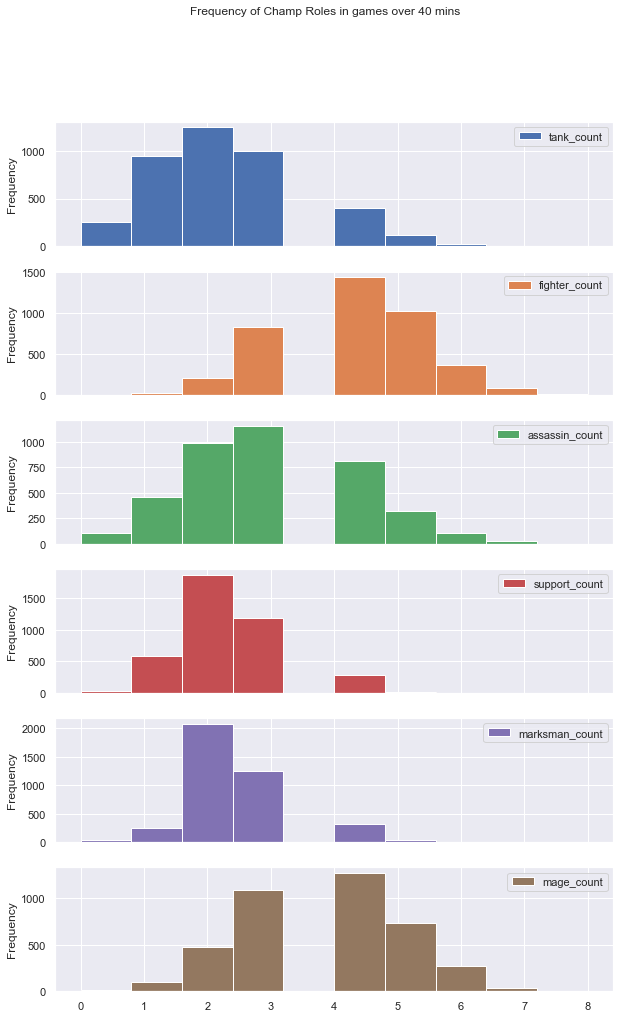

In [58]:
v.set_index('game_length_mins').plot(kind='hist', subplots=True, figsize=(10, 16),
                                     title='Frequency of Champ Roles in games over 40 mins')

In [59]:
v1 = v.support_count.sum()
v2 = v.marksman_count.sum()
v3 = v.mage_count.sum()
v4 = v.tank_count.sum()
v5 = v.assassin_count.sum()
v6 = v.fighter_count.sum()
tot = v1+v2+v3+v4+v5+v6

In [60]:
print(f'supports: {v1}, {(v1/tot) * 100}%')
print(f'marksmen: {v2}, {(v2/tot) * 100}%')
print(f'mage: {v3}, {(v3/tot) * 100}%')
print(f'tank: {v4}, {(v4/tot) * 100}%')
print(f'assassin: {v5}, {(v5/tot) * 100}%')
print(f'fighter: {v6}, {(v6/tot) * 100}%')

supports: 9162, 12.937388799457766%
marksmen: 9653, 13.630715354853287%
mage: 14985, 21.15987460815047%
tank: 8749, 12.354203733514078%
assassin: 11599, 16.378604309638792%
fighter: 16670, 23.539213194385606%


In [61]:
'''
compared to all games above:
supports: 224616, 12.791759185805008%
marksmen: 236950, 13.494173785823344%
mage: 348255, 19.832933073567876%
tank: 225991, 12.870064688887965%
assassin: 290653, 16.55253046368817%
fighter: 429478, 24.458538802227636%
    '''

'\ncompared to all games above:\nsupports: 224616, 12.791759185805008%\nmarksmen: 236950, 13.494173785823344%\nmage: 348255, 19.832933073567876%\ntank: 225991, 12.870064688887965%\nassassin: 290653, 16.55253046368817%\nfighter: 429478, 24.458538802227636%\n    '

What stands out the most is a mages are picked less by 1.3% and fighters are picked more by about 0.9%.  This could be significant given the level of player skill at high rank matches.  This could also say alot about Riot's blancing team and who good a job they do regargless of what people think online.

Explore more questions like specific champion picks and items, look at map objectives. Figure out how to determine win rates.

In [62]:
vaynes = champ_frame(concat, 'Vayne')

In [63]:
len(vaynes)

8694

In [64]:
blue_wins = vaynes[(vaynes.blue_team_win == 'Win') & ((vaynes.p1_champ == 'Vayne') | (vaynes.p2_champ == 'Vayne') | (vaynes.p3_champ == 'Vayne')
                                                      | (vaynes.p4_champ == 'Vayne') | (vaynes.p5_champ == 'Vayne'))]
red_wins = vaynes[(vaynes.red_team_win == 'Win') & ((vaynes.p6_champ == 'Vayne') | (vaynes.p7_champ == 'Vayne') | (vaynes.p8_champ == 'Vayne')
                                                      | (vaynes.p9_champ == 'Vayne') | (vaynes.p10_champ == 'Vayne'))]

wins = len(blue_wins + red_wins)
tot = len(vaynes)
winrate = wins/ tot

In [65]:
def win_rates(champs, df):
    rates = {}
    for champ in champs:
        c = champ_frame(df, champ)
        blue_wins = c[(c.blue_team_win == 'Win') & ((c.p1_champ == champ) | (c.p2_champ == champ) | (c.p3_champ == champ)
                                                      | (c.p4_champ == champ) | (c.p5_champ == champ))]
        red_wins = c[(c.red_team_win == 'Win') & ((c.p6_champ == champ) | (c.p7_champ == champ) | (c.p8_champ == champ)
                                                      | (c.p9_champ == champ) | (c.p10_champ == champ))]

        wins = len(blue_wins + red_wins)
        tot = len(c)
        win_rate = wins/ tot
        rates[champ] = win_rate
    return rates

In [66]:
wr = win_rates(champ_list, concat)

In [67]:
wr_df = pd.DataFrame.from_dict(data=list(wr.items()))

In [68]:
wr_df.columns = ['Champ', 'Win_rate']

In [97]:
wr_df.sort_values(by='Win_rate', ascending = False, inplace=True)

In [98]:
wr_df.head(25)

,Champ,Win_rate
111,Talon,0.566723
6,Annie,0.541230
88,Quinn,0.538280
8,AurelionSol,0.538033
94,Riven,0.532716
56,Khazix,0.531734
110,Taliyah,0.528746
85,Pantheon,0.528346
37,Heimerdinger,0.526722
73,Mordekaiser,0.526619


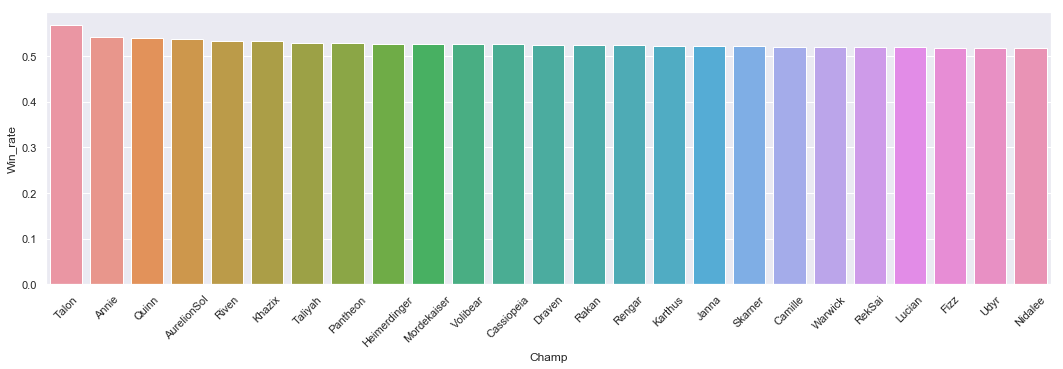

In [99]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45)
sns.barplot(data=wr_df.head(25), x='Champ', y='Win_rate')

Top 25 champs with highest win rates above.  Below Top 25 champs with worst win rates

In [72]:
wr_df.sort_values(by='Win_rate', inplace=True)
wr_df.head(25)

,Champ,Win_rate
33,Gnar,0.445584
40,Ivern,0.457043
18,Corki,0.458057
109,TahmKench,0.461202
17,Chogath,0.466630
22,DrMundo,0.467333
38,Illaoi,0.467372
84,Ornn,0.468641
9,Azir,0.469661
90,Rammus,0.469761


Explore Talon as a champion pick.  Why is his win rate so high? 

In [73]:
#Champion role
champ_type['Talon']

['Assassin', 'Fighter']

In [74]:
#play rate
champ = 'Talon'
q = champ_frame(concat, 'Talon')
qgames_played = len(q)
qplay_rate = len(q)/len(concat) * 100
total_games = len(concat)
print(f'Talon was played in {qgames_played} out of {total_games} from the data: A playrate of {qplay_rate}%')

Talon was played in 7164 out of 113447 from the data: A playrate of 6.314843054465961%


In [105]:
# take a look at games where Talon Won
qn_blue_win = q[(q.blue_team_win == 'Win') & ((q.p1_champ == champ) | (q.p2_champ == champ) | (q.p3_champ == champ)
                                                      | (q.p4_champ == champ) | (q.p5_champ == champ))]
qn_red_win = q[(q.blue_team_win == 'Win') & ((q.p6_champ == champ) | (q.p7_champ == champ) | (q.p8_champ == champ)
                                                      | (q.p9_champ == champ) | (q.p10_champ == champ))]
qn_both_wins = pd.concat([qn_blue_win, qn_red_win])

In [76]:
#Quinn has extremely high mobility.  Let's take a look at her stats at securing map objectives
qn_map_blue = qn_blue_win[['blue_team_baronKills', 'blue_team_dragonKills', 'blue_team_firstBaron', 'blue_team_firstDragon',
                 'blue_team_firstInhibitor', 'blue_team_firstRiftHerald', 'blue_team_firstTower', 'blue_team_inhibitorKills',
                 'blue_team_riftHeraldKills', 'blue_team_towerKills']]
qn_map_red = qn_red_win[['red_team_baronKills', 'red_team_dragonKills', 'red_team_firstBaron', 'red_team_firstDragon',
                 'red_team_firstInhibitor', 'red_team_firstRiftHerald', 'red_team_firstTower', 'red_team_inhibitorKills',
                 'red_team_riftHeraldKills', 'red_team_towerKills']]

In [77]:
#create combine columns
qn_map_blue

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills
233,2,3,True,True,True,True,True,3,1,11
357,1,1,True,False,True,True,True,2,1,8
398,1,3,True,True,True,True,True,4,1,11
467,1,1,True,True,True,True,True,1,1,9
780,0,2,False,True,True,True,True,1,1,8
788,1,2,True,True,True,True,True,2,1,9
883,0,2,False,True,True,True,False,3,1,10
1087,0,2,False,True,True,False,True,1,0,7
1096,0,0,False,False,False,False,True,0,0,3
1203,1,2,True,True,True,True,False,2,1,10


In [100]:
qn_blue_win.head()

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstBlood,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills,blue_team_win,game_id,game_length_mins,p10_champ,p10_name,p10_spell1,p10_spell2,p10_team,p10assists,p10champLevel,p10combatPlayerScore,p10damageDealtToObjectives,p10damageDealtToTurrets,p10damageSelfMitigated,p10deaths,p10doubleKills,p10firstBloodAssist,p10firstBloodKill,p10firstInhibitorAssist,p10firstInhibitorKill,p10firstTowerAssist,p10firstTowerKill,p10goldEarned,p10goldSpent,p10inhibitorKills,p10item0,p10item1,p10item2,p10item3,p10item4,p10item5,p10item6,p10killingSprees,p10kills,p10largestCriticalStrike,p10largestKillingSpree,p10largestMultiKill,p10longestTimeSpentLiving,p10magicDamageDealt,p10magicDamageDealtToChampions,p10magicalDamageTaken,p10neutralMinionsKilled,p10neutralMinionsKilledEnemyJungle,p10neutralMinionsKilledTeamJungle,p10objectivePlayerScore,p10participantId,p10pentaKills,p10perk0,p10perk0Var1,p10perk0Var2,p10perk0Var3,p10perk1,p10perk1Var1,p10perk1Var2,p10perk1Var3,p10perk2,p10perk2Var1,p10perk2Var2,p10perk2Var3,p10perk3,p10perk3Var1,p10perk3Var2,p10perk3Var3,p10perk4,p10perk4Var1,p10perk4Var2,p10perk4Var3,p10perk5,p10perk5Var1,p10perk5Var2,p10perk5Var3,p10perkPrimaryStyle,p10perkSubStyle,p10physicalDamageDealt,p10physicalDamageDealtToChampions,p10physicalDamageTaken,p10quadraKills,p10sightWardsBoughtInGame,p10statPerk0,p10statPerk1,p10statPerk2,p10timeCCingOthers,p10totalDamageDealt,p10totalDamageDealtToChampions,p10totalDamageTaken,p10totalHeal,p10totalMinionsKilled,p10totalPlayerScore,p10totalScoreRank,p10totalTimeCrowdControlDealt,p10totalUnitsHealed,p10tripleKills,p10trueDamageDealt,p10trueDamageDealtToChampions,p10trueDamageTaken,p10turretKills,p10unrealKills,p10visionScore,p10visionWardsBoughtInGame,p10wardsKilled,p10wardsPlaced,p10win,p1_champ,p1_name,p1_spell1,p1_spell2,p1_team,p1assists,p1champLevel,p1combatPlayerScore,p1damageDealtToObjectives,p1damageDealtToTurrets,p1damageSelfMitigated,p1deaths,p1doubleKills,p1firstBloodAssist,p1firstBloodKill,p1firstInhibitorAssist,p1firstInhibitorKill,p1firstTowerAssist,p1firstTowerKill,p1goldEarned,p1goldSpent,p1inhibitorKills,p1item0,p1item1,p1item2,p1item3,p1item4,p1item5,p1item6,p1killingSprees,p1kills,p1largestCriticalStrike,p1largestKillingSpree,p1largestMultiKill,p1longestTimeSpentLiving,p1magicDamageDealt,p1magicDamageDealtToChampions,p1magicalDamageTaken,p1neutralMinionsKilled,p1neutralMinionsKilledEnemyJungle,p1neutralMinionsKilledTeamJungle,p1objectivePlayerScore,p1participantId,p1pentaKills,p1perk0,p1perk0Var1,p1perk0Var2,p1perk0Var3,p1perk1,p1perk1Var1,p1perk1Var2,p1perk1Var3,p1perk2,p1perk2Var1,p1perk2Var2,p1perk2Var3,p1perk3,p1perk3Var1,p1perk3Var2,p1perk3Var3,p1perk4,p1perk4Var1,p1perk4Var2,p1perk4Var3,p1perk5,p1perk5Var1,p1perk5Var2,p1perk5Var3,p1perkPrimaryStyle,p1perkSubStyle,p1physicalDamageDealt,p1physicalDamageDealtToChampions,p1physicalDamageTaken,p1quadraKills,p1sightWardsBoughtInGame,p1statPerk0,p1statPerk1,p1statPerk2,p1timeCCingOthers,p1totalDamageDealt,p1totalDamageDealtToChampions,p1totalDamageTaken,p1totalHeal,p1totalMinionsKilled,p1totalPlayerScore,p1totalScoreRank,p1totalTimeCrowdControlDealt,p1totalUnitsHealed,p1tripleKills,p1trueDamageDealt,p1trueDamageDealtToChampions,p1trueDamageTaken,p1turretKills,p1unrealKills,p1visionScore,p1visionWardsBoughtInGame,p1wardsKilled,p1wardsPlaced,p1win,p2_champ,p2_name,p2_spell1,p2_spell2,p2_team,p2assists,p2champLevel,p2combatPlayerScore,p2damageDealtToObjectives,p2damageDealtToTurrets,p2damageSelfMitigated,p2deaths,p2doubleKills,p2firstBloodAssist,p2firstBloodKill,p2firstInhibitorAssist,p2firstInhibitorKill,p2firstTowerAssist,p2firstTowerKill,p2goldEarned,p2goldSpent,p2inhibitorKills,p2item0,p2item1,p2item2,p2item3,p2item4,p2item5,p2item6,p2killingSprees,p2kills,p2largestCriticalStrike,p2largestKillingSpree,p2largestMultiKill,p2longestTime

In [171]:
def build_row_stats(champ, df):
    '''
    df: should be a dataframe of matches in which contains matches won
    by a specific champion regardless of team EX) qn_both_wins
    
    Build a row for dataframe containing stats for a single champion
    regardless of team for winning match
    '''
    row = {}
    for player in range(1,11):
        if (df['p'+str(player)+'_champ'] == champ) and ((df.p1_champ == champ) |
                                                        (df.p2_champ == champ) |
                                                        (df.p3_champ == champ) |
                                                        (df.p4_champ == champ) |
                                                        (df.p5_champ == champ)):
            
            row['side'] = 'blue'
            row['baronKills'] = df.blue_team_baronKills
            row['dragonKills'] = df.blue_team_dragonKills
            row['firstBaron'] = df.blue_team_firstBaron
            row['firstBlood'] = df.blue_team_firstBlood
            row['firstDragon'] = df.blue_team_firstDragon
            row['firstInhibitor'] = df.blue_team_firstInhibitor
            row['firstRiftHerald'] = df.blue_team_firstRiftHerald
            row['firstTower'] = df.blue_team_firstTower
            row['inhibitorKills'] = df.blue_team_inhibitorKills
            row['riftHeraldKills'] = df.blue_team_riftHeraldKills
            row['towerKills'] = df.blue_team_towerKills
            row['game_id'] = df.game_id
            
            #problem is regex for p1 also finds p10
            player_num = str(player)
            regex = '^p'+player_num+'(?!0)'
            pattern = re.compile(regex)
            
            for name, values in df.iteritems():
                if bool(pattern.match(name)) == True:
                    prefix = len('p'+player_num)
                    col_label = name[prefix:]
                    row[col_label] = df[name]
        
        if (df['p'+str(player)+'_champ'] == champ) and ((df.p6_champ == champ) | 
                                                        (df.p7_champ == champ) | 
                                                        (df.p8_champ == champ) | 
                                                        (df.p9_champ == champ) | 
                                                        (df.p10_champ == champ)):
            
            row['side'] = 'red'
            row['baronKills'] = df.red_team_baronKills
            row['dragonKills'] = df.red_team_dragonKills
            row['firstBaron'] = df.red_team_firstBaron
            row['firstBlood'] = df.red_team_firstBlood
            row['firstDragon'] = df.red_team_firstDragon
            row['firstInhibitor'] = df.red_team_firstInhibitor
            row['firstRiftHerald'] = df.red_team_firstRiftHerald
            row['firstTower'] = df.red_team_firstTower
            row['inhibitorKills'] = df.red_team_inhibitorKills
            row['riftHeraldKills'] = df.red_team_riftHeraldKills
            row['towerKills'] = df.red_team_towerKills
            row['game_id'] = df.game_id
            
            player_num = str(player)
            regex = '^p'+player_num
            pattern = re.compile(regex)
            
            for name, values in df.iteritems():
                if bool(pattern.match(name)) == True:
                    prefix = len('p'+player_num)
                    col_label = name[prefix:]
                    row[col_label] = df[name]
            
    return row
                

In [170]:
x='p10kills'
player = 1
player_num = str(player)
regex = '^p'+player_num+'(?!0)'
pattern = re.compile(regex)
bool(pattern.match(x))

False

In [ ]:
player = 1
player_num = str(player)
regex = '^p'+player_num
pattern = re.compile(regex)
bool(pattern.match())

In [172]:
#use this for wins on blue or red side do not include losses, for example use qn_both_wins
def single_champ_stat(champ, df):
    stats =[]
    for index, row in df.iterrows():
        stats.append(build_row_stats(champ, row))
    
    return pd.DataFrame(stats) 
        

In [173]:
test_df = single_champ_stat('Talon', qn_both_wins)

In [174]:
test_df

,_champ,_name,_spell1,_spell2,_team,assists,baronKills,champLevel,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,dragonKills,firstBaron,firstBlood,firstBloodAssist,firstBloodKill,firstDragon,firstInhibitor,firstInhibitorAssist,firstInhibitorKill,firstRiftHerald,firstTower,firstTowerAssist,firstTowerKill,game_id,goldEarned,goldSpent,inhibitorKills,item0,item1,item2,item3,item4,item5,item6,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicalDamageTaken,neutralMinionsKilled,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,objectivePlayerScore,participantId,pentaKills,perk0,perk0Var1,perk0Var2,perk0Var3,perk1,perk1Var1,perk1Var2,perk1Var3,perk2,perk2Var1,perk2Var2,perk2Var3,perk3,perk3Var1,perk3Var2,perk3Var3,perk4,perk4Var1,perk4Var2,perk4Var3,perk5,perk5Var1,perk5Var2,perk5Var3,perkPrimaryStyle,perkSubStyle,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,quadraKills,riftHeraldKills,side,sightWardsBoughtInGame,statPerk0,statPerk1,statPerk2,timeCCingOthers,totalDamageDealt,totalDamageDealtToChampions,totalDamageTaken,totalHeal,totalMinionsKilled,totalPlayerScore,totalScoreRank,totalTimeCrowdControlDealt,totalUnitsHealed,towerKills,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,Talon,scarra,SummonerFlash,SummonerIgnite,blue,2,2,18,0,10917,4292,14694,4,1,3,True,False,False,False,True,True,False,False,True,True,False,True,2906668290,15950,13025,0,Tiamat,Youmuu's Ghostblade,Serrated Dirk,Duskblade of Draktharr,Lord Dominik's Regards,Boots of Mobility,Oracle Lens,3,9,857,3,2,806,374,374,12448,48,27,9,0,1,0,8112,1239,0,0,8139,1105,0,0,8136,11,237,0,8135,3860,5,0,8226,250,318,0,8233,23,20,0,8100,8200.0,212895,17976,11391,0,1,blue,0,NaN,NaN,NaN,5,215024,18883,24075,6634,262,0,0,453,1,11,0,1755,533,236,3,0,47,4,10,19,True
1,Talon,Rosa,SummonerFlash,SummonerIgnite,blue,4,1,17,0,16925,9178,16767,6,5,1,True,True,False,True,False,True,True,False,True,True,False,True,2897637763,18749,17000,0,Ravenous Hydra,Youmuu's Ghostblade,Edge of Night,Duskblade of Draktharr,Ninja Tabi,Guardian Angel,Farsight Alteration,6,24,951,6,3,627,78,78,7212,16,0,12,0,1,0,8112,1698,0,0,8143,1361,0,0,8138,18,0,0,8105,14,5,0,8233,15,30,0,8232,2,40,0,8100,8200.0,165916,30686,15624,0,1,blue,0,NaN,NaN,NaN,3,170212,31736,24200,2644,201,0,0,257,1,8,1,4218,972,1363,6,0,28,4,5,11,True
2,Talon,scarra,SummonerFlash,SummonerIgnite,blue,5,1,15,0,7828,4370,8829,3,0,3,True,False,False,False,True,True,True,False,True,True,True,False,2889235589,12710,11550,2,Tiamat,Youmuu's Ghostblade,NaN,Duskblade of Draktharr,Mercury's Treads,Lord Dominik's Regards,Oracle Lens,3,8,759,3,1,1076,282,282,3149,13,5,0,0,1,0,8112,1005,0,0,8139,1051,0,0,8136,4,150,0,8135,2018,5,0,8233,18,0,0,8236,14,0,0,8100,8200.0,130263,15958,11202,0,1,blue,0,NaN,NaN,NaN,2,131461,16707,14917,3195,207,0,0,256,1,11,0,916,466,566,2,0,29,2,4,9,True
3,Talon,dad hits me,SummonerFlash,SummonerIgnite,blue,8,1,16,0,4171,4171,9607,5,1,1,True,True,False,False,True,True,False,False,True,True,False,False,2883889472,13034,11700,0,Long Sword,Youmuu's Ghostblade,Tiamat,Boots of Mobility,The Black Cleaver,Duskblade of Draktharr,Warding Totem (Trinket),3,10,656,4,2,774,0,0,7913,3,3,0,0,1,0,8112,1501,0,0,8143,756,0,0,8138,18,0,0,8105,14,5,0,8233,17,0,0,8224,699,0,0,8100,8200.0,110588,19159,9976,0,1,blue,0,NaN,NaN,NaN,3,111845,20036,19080,1541,174,0,0,136,1,9,0,1256,877,1190,2,0,35,4,5,13,True
4,Talon,scarra,SummonerFlash,SummonerIgnite,blue,3,0,15,0,8426,4482,7297,2,1,2,False,False,False,False,True,True,False,False,True,True,False,False,2844925938,12526,10500,0,Tiamat,Caulfield's Warhammer,Duskblade of Draktharr,Boots of Mobility,Lord Dominik's Regards,Serrated Dirk,Oracle Lens,3,8,552,3,2,665,592,592,3517,24,11,0,0,1,0,8112,705,0,0,8139